In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [73]:
import urllib.request as urllib2
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [198]:
# range of years for which to download html records 
years = range(1997,2018)

# create an empty master table where yearly values will be appended to
NihGrantMasterTable = pd.DataFrame(columns=("fiscal_yr","award_type","Nih_ins","activity_code","reviewed","awarded","award_amt"))

# dummy dataframe which will be populated and overwritten after appending its rows to NihGrantMasterTable
nihGrant = {"fiscal_yr":'unknown',"award_type":'unknown',"Nih_ins":'unknown',"activity_code":'unknown',"reviewed":'unknown',"awarded":'unknown',"award_amt":'unknown'}
for yr in years:
    # create url link
    url = "https://report.nih.gov/success_rates/ExcelFile.cfm?Year=" + str(yr)
    print(url)
    page = requests.get(url)
    # warn if there was an error downloading the html file (based on status code returned value)
    # a status code starting with a 2 generally indicates success, and a code starting with a 4 or a 5 indicates an error.
    if page.status_code != 200:
        print("Error for page %s" % url)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    tr_chunk = soup.find_all('tr')
    #type(tr_chunk)
    for tr in tr_chunk:
        #print(len(tr))
        td = tr.find_all('td')
        #print(len(td))
        if(len(td) == 0): # for cases like heading which will return empty
            pass
        else:
            #print(td[0].text)
            nihGrant['fiscal_yr'] = td[0].text.strip() # values have white spaces, removing them from both ends of the string
            nihGrant['award_type'] = td[1].text.strip()
            nihGrant['Nih_ins'] = td[2].text.strip()
            nihGrant['activity_code'] = td[3].text.strip()
            nihGrant['reviewed'] = td[4].text.strip()
            nihGrant['awarded'] = td[5].text.strip()
            nihGrant['award_amt'] = td[6].text.strip()
            temp = pd.DataFrame.from_dict([nihGrant])
            NihGrantMasterTable = pd.concat([NihGrantMasterTable,temp],ignore_index=True)

https://report.nih.gov/success_rates/ExcelFile.cfm?Year=1997
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=1998
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=1999
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=2000
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=2001
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=2002
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=2003
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=2004
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=2005
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=2006
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=2007
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=2008
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=2009
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=2010
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=2011
https://report.nih.gov/success_rates/ExcelFile.cfm?Year=2012
https://report.nih.gov/s

In [199]:
NihGrantMasterTable.shape
NihGrantMasterTable.head()
NihGrantMasterTable.tail()

(6072, 7)

,Nih_ins,activity_code,award_amt,award_type,awarded,fiscal_yr,reviewed
0,NIAAA,P01,$0,New,0,1997,1
1,NINDS,P01,"$6,763,862",New,8,1997,24
2,NIGMS,P01,"$132,753",Supplement,1,1997,3
3,NIGMS,P01,"$6,500,337",New,7.17190980911,1997,22.1719093323
4,NIMH,R37,"$3,030,474",Renewal,13,1997,13


,Nih_ins,activity_code,award_amt,award_type,awarded,fiscal_yr,reviewed
6067,NIAAA,R01,$0,Supplement,0,2017,1
6068,NINR,R01,"$188,395",Supplement,1,2017,2
6069,NIBIB,U01,$0,Supplement,0,2017,1
6070,OD ORIP-SEPA†,R01,"$253,603",Supplement,2,2017,7
6071,NIDDK,UC4,"$19,388,752",Renewal,3,2017,3


In [200]:
NihGrantMasterTable.dtypes
# changing datatypes for groupby calculations later

# first take care of the award amount by removing '$' and ',' symbols and then converting datatype 
NihGrantMasterTable['award_amt'] = NihGrantMasterTable['award_amt'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(float)

# convert other numeric columns -- 'awarded','reviewed' ; to float
for col in ['awarded','reviewed']:
    NihGrantMasterTable[col] = NihGrantMasterTable[col].astype(float)

NihGrantMasterTable.dtypes

Nih_ins          object
activity_code    object
award_amt        object
award_type       object
awarded          object
fiscal_yr        object
reviewed         object
dtype: object

Nih_ins           object
activity_code     object
award_amt        float64
award_type        object
awarded          float64
fiscal_yr         object
reviewed         float64
dtype: object

In [201]:
# with grpby cols as index
nihGrant_FY_activitycode_sum1 = NihGrantMasterTable.groupby(['fiscal_yr', 'activity_code','award_type'], as_index=False)['award_amt','awarded','reviewed'].agg(['sum'])

# with grpby cols not as index
nihGrant_activitycode_FYsum2 = NihGrantMasterTable.groupby(['fiscal_yr', 'activity_code','award_type'])['award_amt','awarded','reviewed'].agg(['sum']).reset_index()

nihGrant_FY_activitycode_sum3 = NihGrantMasterTable.groupby(['fiscal_yr', 'activity_code'])['award_amt','awarded','reviewed'].agg(['sum']).reset_index()

In [202]:
nihGrant_FY_activitycode_sum1.shape
nihGrant_FY_activitycode_sum1.head(10)

nihGrant_activitycode_FYsum2.shape
nihGrant_activitycode_FYsum2.head(10)

nihGrant_FY_activitycode_sum3.shape
nihGrant_FY_activitycode_sum3.head(10)

(677, 3)

award_amt      awarded      reviewed
                                            sum          sum           sum
fiscal_yr activity_code award_type                                        
1997      P01           New          84467620.0    83.036740    236.036740
                        Renewal     122513413.0   100.000000    186.000000
                        Supplement    2519640.0    17.000000     45.000000
          R01           New         691467683.0  2857.745159  12609.745245
                        Renewal     641026087.0  2482.932908   5360.932951
                        Supplement    4639008.0    37.000000     68.000000
          R03           New          32934478.0   550.752550   1895.752563
                        Renewal         72079.0     3.000000      5.000000
          R15           New           2273773.0    24.552370    504.552370
          R21           New          36069773.0   231.031401    565.031403

(677, 6)

,fiscal_yr,activity_code,award_type,award_amt,awarded,reviewed
,,,,sum,sum,sum
0,1997,P01,New,84467620.0,83.036740,236.036740
1,1997,P01,Renewal,122513413.0,100.000000,186.000000
2,1997,P01,Supplement,2519640.0,17.000000,45.000000
3,1997,R01,New,691467683.0,2857.745159,12609.745245
4,1997,R01,Renewal,641026087.0,2482.932908,5360.932951
5,1997,R01,Supplement,4639008.0,37.000000,68.000000
6,1997,R03,New,32934478.0,550.752550,1895.752563
7,1997,R03,Renewal,72079.0,3.000000,5.000000
8,1997,R15,New,2273773.0,24.552370,504.552370


(374, 5)

,fiscal_yr,activity_code,award_amt,awarded,reviewed
,,,sum,sum,sum
0,1997,P01,2.095007e+08,200.036739,467.036740
1,1997,R01,1.337133e+09,5377.678067,18038.678196
2,1997,R03,3.300656e+07,553.752550,1900.752563
3,1997,R15,2.273773e+06,24.552370,504.552370
4,1997,R21,4.442437e+07,271.031401,615.031403
5,1997,R29,6.360940e+07,616.731021,2202.731018
6,1997,R37,4.548109e+07,145.746050,154.746050
7,1997,R55,5.050984e+06,96.000000,96.000000
8,1997,U01,6.844851e+07,90.965760,204.965760


## What fraction of awarded grants are R01 series (research grants) ?

Anecdotal evidence suggests that these will make up a major fraction. Lets check that.

In [205]:
# subset R01

nihGrant_FY_activitycode_R01sumOnly = nihGrant_FY_activitycode_sum3.loc[nihGrant_FY_activitycode_sum3['activity_code'] == "R01"]
nihGrant_FY_activitycode_R01sumOnly.columns = nihGrant_FY_activitycode_R01sumOnly.columns.droplevel(1)
nihGrant_FY_activitycode_R01sumOnly.head()

,fiscal_yr,activity_code,award_amt,awarded,reviewed
1,1997,R01,1.337133e+09,5377.678067,18038.678196
11,1998,R01,1.453277e+09,5541.000000,17947.000000
21,1999,R01,1.923185e+09,6818.000000,21560.000000
32,2000,R01,2.100837e+09,6884.000000,21903.000000
42,2001,R01,2.235378e+09,6817.000000,21805.000000


In [141]:
NihGrantMasterTable.head()
nihGrant_FYsum = NihGrantMasterTable.groupby(['fiscal_yr'], as_index=False)['award_amt','awarded','reviewed'].agg(['sum'])
nihGrant_FYsum.head()

,Nih_ins,activity_code,award_amt,award_type,awarded,fiscal_yr,reviewed
0,NIAAA,P01,0.0,New,0.00000,1997,1.000000
1,NINDS,P01,6763862.0,New,8.00000,1997,24.000000
2,NIGMS,P01,132753.0,Supplement,1.00000,1997,3.000000
3,NIGMS,P01,6500337.0,New,7.17191,1997,22.171909
4,NIMH,R37,3030474.0,Renewal,13.00000,1997,13.000000


,award_amt,awarded,reviewed
,sum,sum,sum
fiscal_yr,,,
1997,1.817373e+09,7388.493957,24221.494099
1998,1.920127e+09,7518.000000,24151.000000
1999,2.515764e+09,8556.000000,26408.000000
2000,2.911899e+09,8765.000000,27798.000000
2001,3.029002e+09,9098.000000,28368.000000


In [167]:
# columnnames
list(nihGrant_FYsum)
nihGrant_FYsum.shape
#nihGrant_FYsum.rename(columns={('award_amt', 'sum'): "award_amt_total", ('awarded', 'sum'): "awarded_total", ('reviewed', 'sum'): "reviewed_total"},inplace=True)
nihGrant_FYsum.columns = nihGrant_FYsum.columns.droplevel(1) # drop the sum level
list(nihGrant_FYsum)

[('award_amt', 'sum'), ('awarded', 'sum'), ('reviewed', 'sum')]

(21, 3)

['award_amt', 'awarded', 'reviewed']

# Annual trend of NIH grant success rate

## Lets plot the trends for total number of grants reviewed, awarded, number of R01 grants (awarded) and the $$ amount of awarded money

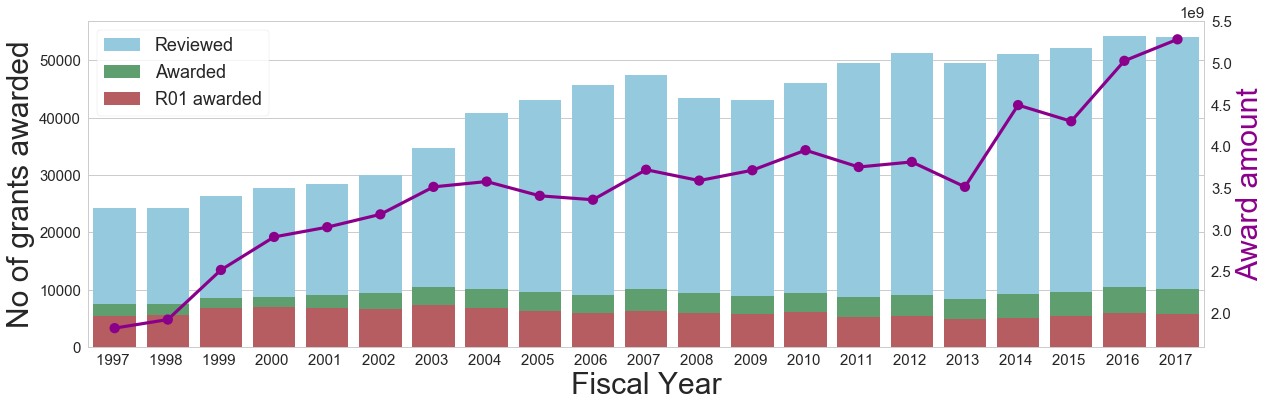

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set(style="whitegrid",rc = {'xtick.labelsize':15, 
                               'ytick.labelsize':15,
                               'axes.labelsize':30})

f, ax = plt.subplots(figsize=(20, 6))
sns.set_color_codes("deep")
sns.barplot(x=nihGrant_FYsum.index, y="reviewed", data=nihGrant_FYsum,label="Reviewed", color="skyblue")
sns.set_color_codes("deep")
sns.barplot(x=nihGrant_FYsum.index, y="awarded", data=nihGrant_FYsum,label="Awarded", color="g")
sns.barplot(x=nihGrant_FY_activitycode_R01sumOnly.fiscal_yr, y="awarded", data=nihGrant_FY_activitycode_R01sumOnly,label="R01 awarded", color="r")

ax2 = ax.twinx()
sns.pointplot(x=nihGrant_FYsum.index, y="award_amt", ax=ax2, data=nihGrant_FYsum,label="Award amount", color="darkmagenta")
ax2.set_ylabel(ylabel = "Award amount",color='darkmagenta')
ax2.grid(None)

# Add a legend and informative axis label

ax.legend(ncol=1, loc="best", frameon=True, fontsize = '18')
ax.set(ylabel="No of grants awarded",xlabel="Fiscal Year");